# State of Data Brazil 2022 | Kaggle

## Objetivo

Quais fatores tornam um profissional da área de dados satisfeito

## Metodologia

Usarei a base de dados disponibilizada no desafio State of Data 2022

### Configuração inicial

In [2]:
#Importando bibliotecas utilizadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Configurando Pandas para exibir todas as colunas (são muitas colunas)
pd.set_option('display.max_columns', None)

#Revertendo a configuração
#pd.reset_option('display.max_columns')

In [4]:
#Carregamento do Dataset

data = pd.read_csv('data/State_of_data_2022.csv')

In [5]:
#Melhorando a leitura das colunas

data.columns = [coluna.strip("()").replace("'", "").replace(", ", "_") for coluna in data.columns]

In [5]:
#Testando o novo modo de leitura das colunas
data.head()

,P0_id,P1_a _Idade,P1_a_1 _Faixa idade,P1_b _Genero,P1_c _Cor/raca/etnia,P1_d _PCD,P1_e _experiencia_profissional_prejudicada,P1_f _aspectos_prejudicados,P1_g _vive_no_brasil,P1_i _Estado onde mora,P1_i_1 _uf onde mora,P1_i_2 _Regiao onde mora,P1_j _Mudou de Estado?,P1_k _Regiao de origem,P1_l _Nivel de Ensino,P1_m _Área de Formação,P2_a _Qual sua situação atual de trabalho?,P2_b _Setor,P2_c _Numero de Funcionarios,P2_d _Gestor?,P2_e _Cargo como Gestor,P2_f _Cargo Atual,P2_g _Nivel,P2_h _Faixa salarial,P2_i _Quanto tempo de experiência na área de dados você tem?,P2_j _Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,P2_k _Você está satisfeito na sua empresa atual?,P2_l _Qual o principal motivo da sua insatisfação com a empresa atual?,P2_l_1 _Falta de oportunidade de crescimento no emprego atual,P2_l_2 _Salário atual não corresponde ao mercado,P2_l_3 _Não tenho uma boa relação com meu líder/gestor,P2_l_4 _Gostaria de trabalhar em em outra área de atuação,P2_l_5 _Gostaria de receber mais benefícios,P2_l_6 _O clima de trabalho/ambiente não é bom,P2_l_7 _Falta de maturidade analítica na empresa,P2_m _Você participou de entrevistas de emprego nos últimos 6 meses?,P2_n _Você pretende mudar de emprego nos próximos 6 meses?,P2_o _Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,P2_o_1 _Remuneração/Salário,P2_o_2 _Benefícios,P2_o_3 _Propósito do trabalho e da empresa,P2_o_4 _Flexibilidade de trabalho remoto,P2_o_5 _Ambiente e clima de trabalho,P2_o_6 _Oportunidade de aprendizado e trabalhar com referências na área,P2_o_7 _Plano de carreira e oportunidades de crescimento profissional,P2_o_8 _Maturidade da empresa em termos de tecnologia e dados,P2_o_9 _Qualidade dos gestores e líderes,P2_o_10 _Reputação que a empresa tem no mercado,P2_p _Atualmente qual a sua forma de trabalho?,P2_q _Qual a forma de trabalho ideal para você?,P2_r _Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,P2_s _Sua empresa passu por Layoff em 2022?,P3_a _Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?,P3_b _Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?,P3_b_1 _Analytics Engineer,P3_b_2 _Engenharia de Dados/Data Engineer,P3_b_3 _Analista de Dados/Data Analyst,P3_b_4 _Cientista de Dados/Data Scientist,P3_b_5 _Database Administrator/DBA,P3_b_6 _Analista de Business Intelligence/BI,P3_b_7 _Arquiteto de Dados/Data Architect,P3_b_8 _Data Product Manager/DPM,P3_b_9 _Business Analyst,P3_c _Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?,P3_c_1 _Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.,P3_c_2 _Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.,P3_c_3 _Atração_seleção e contratação de talentos para o time de dados.,P3_c_4 _Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.,P3_c_5 _Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados_garantindo a qualidade e confiabilidade da informação.,P3_c_6 _Sou gestor da equipe responsável pela entrega de dados_estudos_relatórios e dashboards para as áreas de negócio da empresa.,P3_c_7 _Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.,P3_c_8 _Apesar de ser gestor ainda atuo na parte técnica_construindo soluções/análises/modelos etc.,P3_c_9 _Gestão de projetos de dados_cuidando das etapas_equipes envolvidas_atingimento dos objetivos etc.,P3_c_10 _Gestão de produtos de dados_cuidando da visão dos produtos_backlog_feedback de usuários etc.,P3_c_11 _Gestão de pessoas_apoio no desenvolvimento das pessoas_evolução de carreira,P3_d _Quais são os 3 maiores desafios que você tem como gestor no atual momento?,P3_d

In [6]:
#Acessando o id dos usuários pesquisados para criar novos datasets, separando todas as 8 partes da pesquisa
#Deixando-as vinculadas ao id

coluna_principal = data.iloc[:,0]

### Trabalhando os dados de análise de objetivos

In [7]:
#Separando todas as perguntas da parte 5 em um novo dataset para análise de objetivos

colunas_p5 = [coluna for coluna in data.columns if coluna.startswith('P5')]

data_parte5 = pd.concat([coluna_principal] + [data[coluna] for coluna in colunas_p5], axis=1)

In [10]:
data_parte5.head(50)

,P0_id,P5_a _Qual seu objetivo na área de dados?,P5_b _Qual oportunidade você está buscando?,P5_c _Há quanto tempo você busca uma oportunidade na área de dados?,P5_d _Como tem sido a busca por um emprego na área de dados?
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,NaN,NaN,NaN,NaN
1,zzls2oftfn9law393oezzls2ofhvfpzd,NaN,NaN,NaN,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,NaN,NaN,NaN,NaN
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,NaN,NaN,NaN,NaN
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,NaN,NaN,NaN,NaN
5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,NaN,NaN,NaN,NaN
6,zytlxsdgalh22cgrijvzytlxa49i8yzx,NaN,NaN,NaN,NaN
7,zyc0twzno2sm5or5ovoxzyc0twz0300d,NaN,NaN,NaN,NaN
8,zy4o5dk6iuxpdwgzy4o58xvd6ykwohrj,NaN,NaN,NaN,NaN
9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,NaN,NaN,NaN


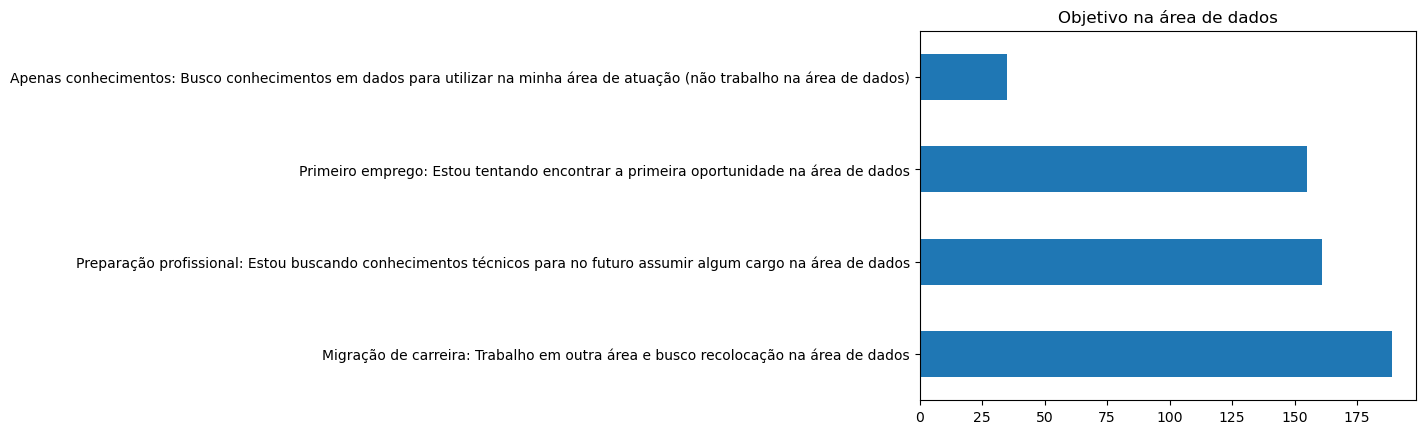

In [9]:
selecao = data_parte5['P5_a _Qual seu objetivo na área de dados?']

contagem = selecao.value_counts()

top5 = contagem.head(4)

top5.plot(kind='barh')
plt.title('Objetivo na área de dados')
plt.show()

Insight: Limitado em 3 pelo valor das demais ocorrências ficarem abaixo de 5. Agrupando esses grupos, dá para concluir que a maioria dos entrevistados com objetivos claros, está procurando migrar de área ou se preparando para entrar na área.

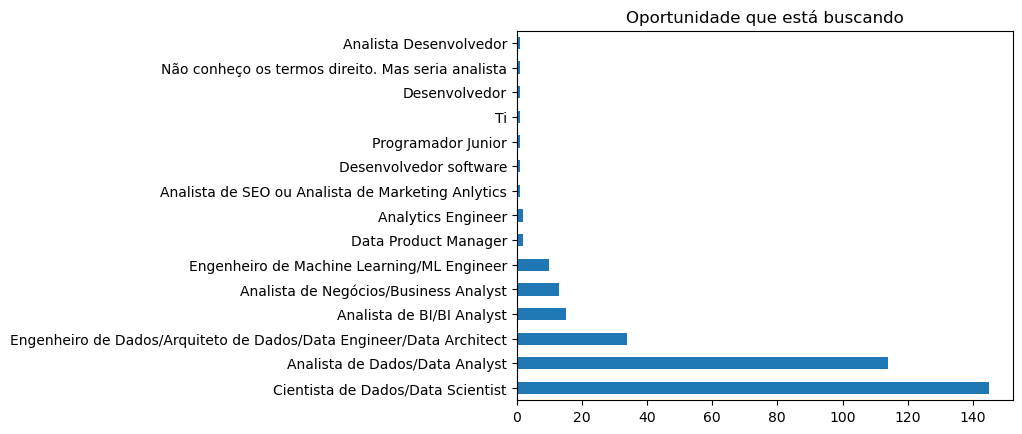

In [30]:
selecao = data_parte5['P5_b _Qual oportunidade você está buscando?']

contagem = selecao.value_counts()

contagem.plot(kind='barh')
plt.title('Oportunidade que está buscando')
plt.show()

Insight: Dentre os que buscam oportunidades, a maioria se divide entre os que buscam oportunidades como analista ou cientista de dados.

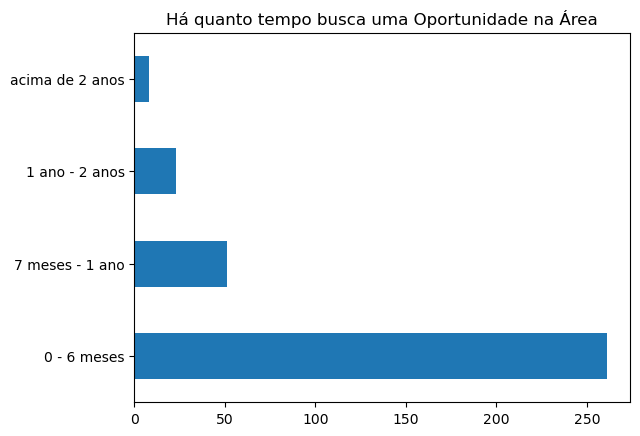

In [32]:
selecao = data_parte5['P5_c _Há quanto tempo você busca uma oportunidade na área de dados?']

contagem = selecao.value_counts()

contagem.plot(kind='barh')
plt.title('Há quanto tempo busca uma Oportunidade na Área')
plt.show()

Insight: Grande maioria dos que buscam oportunidade o fazem de 0 a 6 meses, o que pode indicar que muitos profissionais conseguiram colocação no mercado em até um ano ou simplesmente desistiram da carreira.

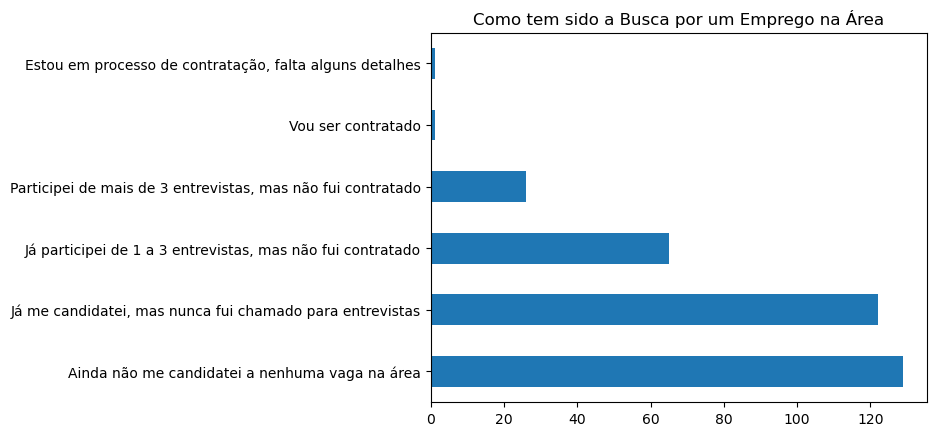

In [34]:
selecao = data_parte5['P5_d _Como tem sido a busca por um emprego na área de dados?']

contagem = selecao.value_counts()

contagem.plot(kind='barh')
plt.title('Como tem sido a Busca por um Emprego na Área')
plt.show()

Insight: Pessoas que aindam não se candidataram formam maioria, porém o número de pessoas que ainda não atuam na área e se candidatam para entrevistas é relativamente alto entre os entrevistados que não trabalham ainda na área de dados